In [46]:
#importing necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from skimage.color import lab2rgb
import scipy
from scipy import integrate
from PIL import Image

In [47]:
from google.colab import drive
from google.colab import files
from google.colab import auth
drive.mount('/content/drive')
import gspread
from google.auth import default
#autenticating to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
#file paths
file_path = '/content/drive/MyDrive/AY 2023-2024/1st Semester/App Physics 167/CIE_xyz_1964_10deg.xlsx'
image_path = '/content/drive/MyDrive/AY 2023-2024/1st Semester/App Physics 167/CIE_LUV.png'

In [49]:
#reading the files and converting the columns to float
chromaticity_table = pd.read_excel(file_path)
chromaticity_table["Wavelength"] = chromaticity_table["Wavelength"].astype(float)
chromaticity_table["X"] = chromaticity_table["X"].astype(float)
chromaticity_table["Y"] = chromaticity_table["Y"].astype(float)
chromaticity_table["Z"] = chromaticity_table["Z"].astype(float)
chromaticity_table["X+Y+Z"] = chromaticity_table["X+Y+Z"].astype(float)
chromaticity_table["x"] = chromaticity_table["x"].astype(float)
chromaticity_table["y"] = chromaticity_table["y"].astype(float)
chromaticity_table["z"] = chromaticity_table["z"].astype(float)
chromaticity_table.head(10)


,Wavelength,x_bar,y_bar,z_bar,X,Y,Z,X+Y+Z,x,y,...,u',v',D65_x_bar,D65_y_bar,D65_z_bar,X_n,Y_n,Z_n,u'_d65,v'_d65
0,360.0,1.222000e-07,1.339800e-08,5.350270e-07,0.000044,0.000005,0.000193,0.000241,0.182218,0.019978,...,0.253494,0.062534,0.000006,6.248599e-07,0.000025,1101.79994,1161.93003,1247.690134,0.197865,0.469492
1,370.0,5.958600e-06,6.511000e-07,2.614370e-05,0.002205,0.000241,0.009673,0.012119,0.181923,0.019879,...,0.253137,0.062236,0.000310,3.391521e-05,0.001362,NaN,NaN,NaN,NaN,NaN
2,380.0,1.599520e-04,1.736400e-05,7.047760e-04,0.060782,0.006598,0.267815,0.335195,0.181333,0.019685,...,0.252416,0.061654,0.007994,8.677746e-04,0.035222,NaN,NaN,NaN,NaN,NaN
3,390.0,2.361600e-03,2.534000e-04,1.048220e-02,0.921024,0.098826,4.088058,5.107908,0.180313,0.019348,...,0.251173,0.060639,0.129057,1.384785e-02,0.572833,NaN,NaN,NaN,NaN,NaN
4,400.0,1.910970e-02,2.004400e-03,8.601090e-02,7.643880,0.801760,34.404360,42.850000,0.178387,0.018711,...,0.248817,0.058721,1.581421,1.658739e-01,7.117823,NaN,NaN,NaN,NaN,NaN
5,410.0,8.473600e-02,8.756000e-03,3.893660e-01,34.741760,3.589960,159.640060,197.971780,0.175488,0.018134,...,0.244871,0.056932,7.752158,8.010514e-01,35.621538,NaN,NaN,NaN,NaN,NaN
6,420.0,2.044920e-01,2.139100e-02,9.725420e-01,85.886640,8.984220,408.467640,503.338500,0.170634,0.017849,...,0.237575,0.055916,19.106056,1.998600e+00,90.866350,NaN,NaN,NaN,NaN,NaN
7,430.0,3.146790e-01,3.867600e-02,1.553480e+00,135.311970,16.630680,667.996400,819.939050,0.165027,0.020283,...,0.226581,0.062658,27.277099,3.352525e+00,134.659219,NaN,NaN,NaN,NaN,NaN
8,440.0,3.837340e-01,6.207700e-02,1.967280e+00,168.842960,27.313880,865.603200,1061.760040,0.159022,0.025725,...,0.212691,0.077416,40.240266,6.509705e+00,206.298817,NaN,NaN,NaN,NaN,NaN
9,450.0,3.707020e-01,8.945600e-02,1.994800e+00,166.815900,40.255200,897.660000,1104.731100,0.151001,0.036439,...,0.192649,0.104601,43.375100,1.046707e+01,233.407558,NaN,NaN,NaN,NaN,NaN


In [50]:
temp = np.arange(1000, 10000 + 1, 1000)
def blackbody_radiation(wavelength, temperature):
  '''solving for the blackbody radiation per wavelength and temperature'''
  h = 6.6262e-34
  c = 3.0e8
  k = 1.380649e-23
  num = 2*h*c**2
  wavelength_k_t = np.float64(wavelength)*np.float64(k)*temperature
  exponential = np.exp((h*c)/(wavelength_k_t))
  blackbody = (num)/( (wavelength**5)*(exponential - 1)  )
  return blackbody


Pval = []
for temp in temp:
    Pval.append(blackbody_radiation(chromaticity_table["Wavelength_m"], temp))
Pval = np.array(Pval)

int_x = np.sum(np.multiply(Pval, np.array(chromaticity_table["x_bar"])),axis=1)
int_y = np.sum(np.multiply(Pval, np.array(chromaticity_table["y_bar"])),axis =1)
int_z = np.sum(np.multiply(Pval, np.array(chromaticity_table["z_bar"])),axis =1)


def CIE_coordinates(X,Y,Z):
    denom = np.sum([X,Y,Z], axis = 0)
    x = np.array(int_x)/denom
    y = np.array(int_y)/denom
    return x,y

now_x, now_y = CIE_coordinates(int_x,int_y, int_z)


now_x_values = []
now_y_values = []
for n in range(len(now_x)):
    now_x_values.append(now_x[n])


for n in range(len(now_x)):
    now_y_values.append(now_y[n])

def uv_convert(x,y):
  denom = -2*x + 12*y +3
  up = (4*x)/denom
  vp = 9*y/denom

  return up, vp

uv_values = []

for x, y in zip(now_x_values, now_y_values):
    up, vp = uv_convert(x, y)
    uv_values.append((up, vp))

up_values, vp_values = zip(*uv_values)


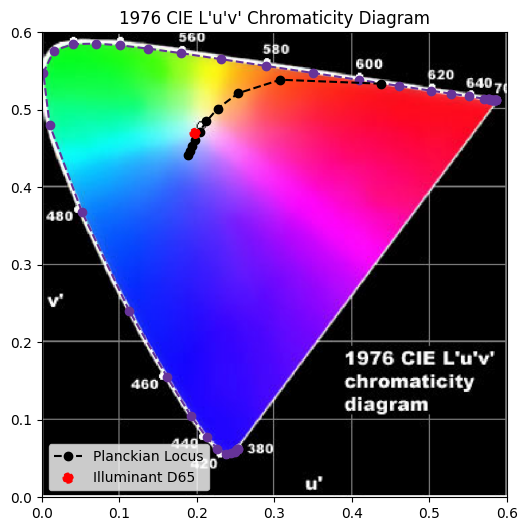

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [51]:
img = np.array(Image.open(image_path))
fig, ax = plt.subplots(figsize= (6,7))
ax.plot(chromaticity_table["u'"], chromaticity_table["v'"], ls = '--', color= 'rebeccapurple', marker = 'o', zorder =1)
ax.plot(up_values, vp_values, ls = '--', color = 'black', marker = 'o',label='Planckian Locus')
ax.scatter(chromaticity_table["u'_d65"], chromaticity_table["v'_d65"], ls = '--', color= 'red', marker = 'o', s= 50, zorder=2,label='Illuminant D65')
ax.imshow(img, extent = [0,.6,0,.6])
ax.set_title("1976 CIE L'u'v' Chromaticity Diagram")
ax.legend()
plt.savefig("1976 CIE L'u'v' chromaticity diagram.png")
plt.show()
files.download("1976 CIE L'u'v' chromaticity diagram.png")


In [52]:
mat = scipy.io.loadmat('/content/drive/MyDrive/AY 2023-2024/1st Semester/App Physics 167/munsell400_700_5.mat')
print(mat['C'].shape)
print(mat['munsell'].shape)
print(mat['S'].shape)
print(mat['C'].T.shape)
print(mat['munsell'].T.shape)

(16, 1250)
(61, 1250)
(1250,)
(1250, 16)
(1250, 61)


In [53]:
#defining my excel worksheet
worksheet = gc.open_by_key('1oTqS_gmjdBH8ElhTLV4heZN5WDFyLoRIlBPtfKcmcvI')
act2 = worksheet.worksheet('Sheet1')

all_values = act2.get_all_values()

# Convert to a DataFrame with the first row as column headers
all_values_df = pd.DataFrame(all_values[1:], columns=all_values[0])

all_values_df = all_values_df.apply(pd.to_numeric, errors='coerce')
# Display the DataFrame
all_values_df.head()


,Wavelength,LED1,LED2,LED3,LED4,LED4_Norm,LED5,LED6,LED7,LED8,...,X_D65,Y_D65,Z_D65,Sum_X_LED4,Sum_Y_LED4,Sum_Z_LED4,Sum_X_D65,Sum_Y_D65,Sum_Z_D65,
0,400,0.038703,0.023177,0.049120,0.030647,0.001171,0.070266,0.076891,0.023176,2.623719,...,0.013423,0.001408,0.060417,1269.298182,1257.426588,1117.165565,8820.059346,9312.597869,9972.784558,0
1,401,0.044174,0.027093,0.057766,0.037117,NaN,0.082514,0.089905,0.027092,3.417719,...,1.905715,0.199536,8.591941,NaN,NaN,NaN,NaN,NaN,NaN,1
2,402,0.050419,0.031670,0.067934,0.044953,NaN,0.096897,0.105482,0.031669,4.395316,...,2.282459,0.238462,10.309134,NaN,NaN,NaN,NaN,NaN,NaN,2
3,403,0.057547,0.037020,0.079891,0.054443,NaN,0.113786,0.124082,0.037019,5.550235,...,2.717375,0.283357,12.295592,NaN,NaN,NaN,NaN,NaN,NaN,3
4,404,0.065683,0.043275,0.093952,0.065936,NaN,0.133619,0.146305,0.043274,6.897513,...,3.215127,0.334640,14.574931,NaN,NaN,NaN,NaN,NaN,NaN,4


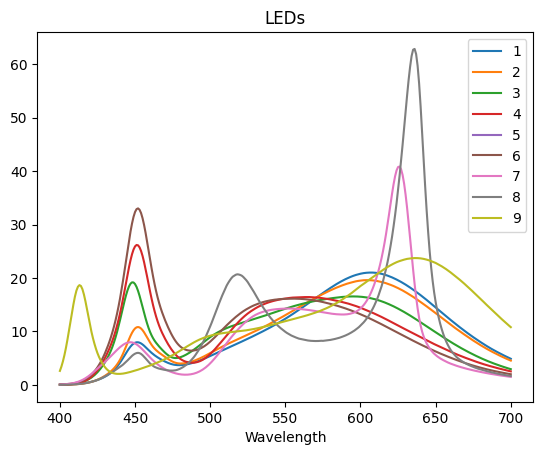

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [54]:
wavelength = np.array(all_values_df.iloc[:,0])

for i in range(1,10):
  plt.plot(wavelength,np.array(all_values_df.iloc[:,i]),label = str(i) )

# Add labels and legend
plt.xlabel('Wavelength')
plt.legend()
plt.title('LEDs')

plt.savefig("LEDs.png")
plt.show()
files.download("LEDs.png")


In [55]:
worksheet = gc.open_by_key('1oTqS_gmjdBH8ElhTLV4heZN5WDFyLoRIlBPtfKcmcvI')
act2 = worksheet.worksheet('Sheet2')

# get_all_values gives a list of rows
all_values = act2.get_all_values()

# Convert to a DataFrame with the first row as column headers
all_values_df = pd.DataFrame(all_values[1:], columns=all_values[0])

# Convert all contents to float
all_values_df = all_values_df.apply(pd.to_numeric, errors='coerce')

# Display the DataFrame
all_values_df.head()



,Wavelength,LED1,LED2,LED3,LED4,LED4_Norm,LED5,LED6,LED7,LED8,...,X_D65,Y_D65,Z_D65,Sum_X_LED4,Sum_Y_LED4,Sum_Z_LED4,Sum_X_D65,Sum_Y_D65,Sum_Z_D65,
0,400,0.038703,0.023177,0.049120,0.030647,0.001183,0.070266,0.076891,0.023176,2.623719,...,0.013423,0.001408,0.060417,12.133666,12.019978,10.678743,18.685134,19.721481,21.146552,0
1,405,0.074968,0.050586,0.110488,0.079856,0.003082,0.156908,0.173002,0.050584,8.427665,...,0.032094,0.003334,0.145768,NaN,NaN,NaN,NaN,NaN,NaN,0
2,410,0.145213,0.110406,0.248514,0.208072,0.008031,0.350359,0.410670,0.110403,16.512449,...,0.065801,0.006799,0.302359,NaN,NaN,NaN,NaN,NaN,NaN,0
3,415,0.282964,0.241433,0.558376,0.542348,0.020934,0.780603,0.934325,0.241003,17.895780,...,0.110373,0.011345,0.515425,NaN,NaN,NaN,NaN,NaN,NaN,0
4,420,0.525865,0.501833,1.203112,1.310526,0.050585,1.674673,1.843380,0.496570,11.255493,...,0.162174,0.016964,0.771283,NaN,NaN,NaN,NaN,NaN,NaN,0


In [56]:

# Function to generate Rs, Ss, and Cs
def chips():
    reflectivity = []
    S = []
    C = []
    indices = np.arange(0, 1250, 1)
    choices = np.random.choice(indices, size=3, replace=False)

    r = np.array(mat['munsell'].T)
    s = np.array(mat['S'])
    c = np.array(mat['C'].T)
    for i in choices:
        reflectivity.append(r[i])
        S.append(s[i])
        C.append(c[i])

    return np.array(reflectivity), np.array(S), np.array(C)

# Generate Rs, Ss, and Cs using the chips() function
Rs, Ss, Cs = chips()

# Create a new column in all_values_df with the product of LED4, x_bar, and Rs
for r in range(len(Rs)):
    all_values_df.loc[r, 'X_chip_LED4'] = np.sum(
        np.array(all_values_df["LED4_Norm"]) * np.array(all_values_df["x_bar"] * Rs[r]))
    all_values_df.loc[r, 'Y_chip_LED4'] = np.sum(
        np.array(all_values_df["LED4_Norm"]) * np.array(all_values_df["y_bar"] * Rs[r]))
    all_values_df.loc[r, 'Z_chip_LED4'] = np.sum(
        np.array(all_values_df["LED4_Norm"]) * np.array(all_values_df["z_bar"] * Rs[r]))
    all_values_df.loc[r, 'X_chip_D65'] = np.sum(
        np.array(all_values_df["D65 Max"]) * np.array(all_values_df["x_bar"] * Rs[r]))
    all_values_df.loc[r, 'Y_chip_D65'] = np.sum(
        np.array(all_values_df["D65 Max"]) * np.array(all_values_df["y_bar"] * Rs[r]))
    all_values_df.loc[r, 'Z_chip_D65'] = np.sum(
        np.array(all_values_df["D65 Max"]) * np.array(all_values_df["z_bar"] * Rs[r]))


# Display the modified DataFrame
all_values_df.head(10)


,Wavelength,LED1,LED2,LED3,LED4,LED4_Norm,LED5,LED6,LED7,LED8,...,Sum_X_D65,Sum_Y_D65,Sum_Z_D65,,X_chip_LED4,Y_chip_LED4,Z_chip_LED4,X_chip_D65,Y_chip_D65,Z_chip_D65
0,400,0.038703,0.023177,0.049120,0.030647,0.001183,0.070266,0.076891,0.023176,2.623719,...,18.685134,19.721481,21.146552,0,2.208554,2.385349,5.265250,3.581328,4.573324,10.081161
1,405,0.074968,0.050586,0.110488,0.079856,0.003082,0.156908,0.173002,0.050584,8.427665,...,NaN,NaN,NaN,0,5.793038,5.549823,5.018299,8.923514,8.995824,10.065961
2,410,0.145213,0.110406,0.248514,0.208072,0.008031,0.350359,0.410670,0.110403,16.512449,...,NaN,NaN,NaN,0,7.680267,7.860523,7.277996,11.834036,12.981790,14.625112
3,415,0.282964,0.241433,0.558376,0.542348,0.020934,0.780603,0.934325,0.241003,17.895780,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
4,420,0.525865,0.501833,1.203112,1.310526,0.050585,1.674673,1.843380,0.496570,11.255493,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
5,425,0.919682,0.963004,2.372601,2.751313,0.106198,3.295815,3.054492,0.940314,5.944496,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
6,430,1.538682,1.710355,4.240946,5.041662,0.194603,5.940310,4.292893,1.604600,3.311128,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
7,435,2.519606,2.818138,7.172349,8.311863,0.320830,9.921219,5.691800,2.429036,2.249742,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
8,440,4.159352,4.707965,12.111483,13.365908,0.515911,16.148254,7.059239,3.384970,2.068815,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN
9,445,6.390313,7.869433,17.701758,20.608535,0.795470,25.154324,7.910170,4.588720,2.292569,...,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN


In [57]:
def solve_Lstar(Y, Yn):
    ratio = Y/Yn

    if ratio <= (6/29)**3:
        L = ((29/3)**3)*ratio
    else:
        L = 116*ratio**(1/3) - 16
    return L
def f(t):
    if t > (6/29)**3:
        ans = t**(1/3)
    else:
        ans = 7.787*t + (16/116)
    return ans

def convert_Lab(X, Y, Z, Xn, Yn, Zn ):

    Lstar = solve_Lstar(Y, Yn)

    astar = 500*(f(X/Xn) - f(Z/Zn))
    bstar = 500*(f(Y/Yn) - f(Z/Zn))

    return Lstar, astar, bstar


Lstar_D65, astar_D65, bstar_D65 = convert_Lab(all_values_df.loc[0,"X_chip_D65"], all_values_df.loc[0,"Y_chip_D65"], all_values_df.loc[0,"Z_chip_D65"], all_values_df.loc[0,"Sum_X_D65"], all_values_df.loc[0,"Sum_Y_D65"], all_values_df.loc[0,"Sum_Z_D65"])
Lstar_white, astar_white, bstar_white = convert_Lab(all_values_df.loc[0,"X_chip_LED4"], all_values_df.loc[0,"Y_chip_LED4"], all_values_df.loc[0,"Z_chip_LED4"], all_values_df.loc[0,"Sum_X_LED4"], all_values_df.loc[0,"Sum_Y_LED4"], all_values_df.loc[0,"Sum_Z_LED4"])

In [58]:
D65Params = []
LEDParams = []
chip_S = []
for x in range(3):
  D65Params.append(convert_Lab(all_values_df.loc[x,"X_chip_D65"], all_values_df.loc[x,"Y_chip_D65"], all_values_df.loc[x,"Z_chip_D65"], all_values_df.loc[0,"Sum_X_D65"], all_values_df.loc[0,"Sum_Y_D65"], all_values_df.loc[0,"Sum_Z_D65"]))
  chip_S.append(Ss[x])

for x in range(3):
  LEDParams.append(convert_Lab(all_values_df.loc[x,"X_chip_LED4"], all_values_df.loc[x,"Y_chip_LED4"], all_values_df.loc[x,"Z_chip_LED4"], all_values_df.loc[0,"Sum_X_LED4"], all_values_df.loc[0,"Sum_Y_LED4"], all_values_df.loc[0,"Sum_Z_LED4"]))


The color difference ΔE is: 22.31911 thus it is differentiable
The color difference ΔE is: 3.63581 thus it is differentiable
The color difference ΔE is: 2.40832 thus it is differentiable


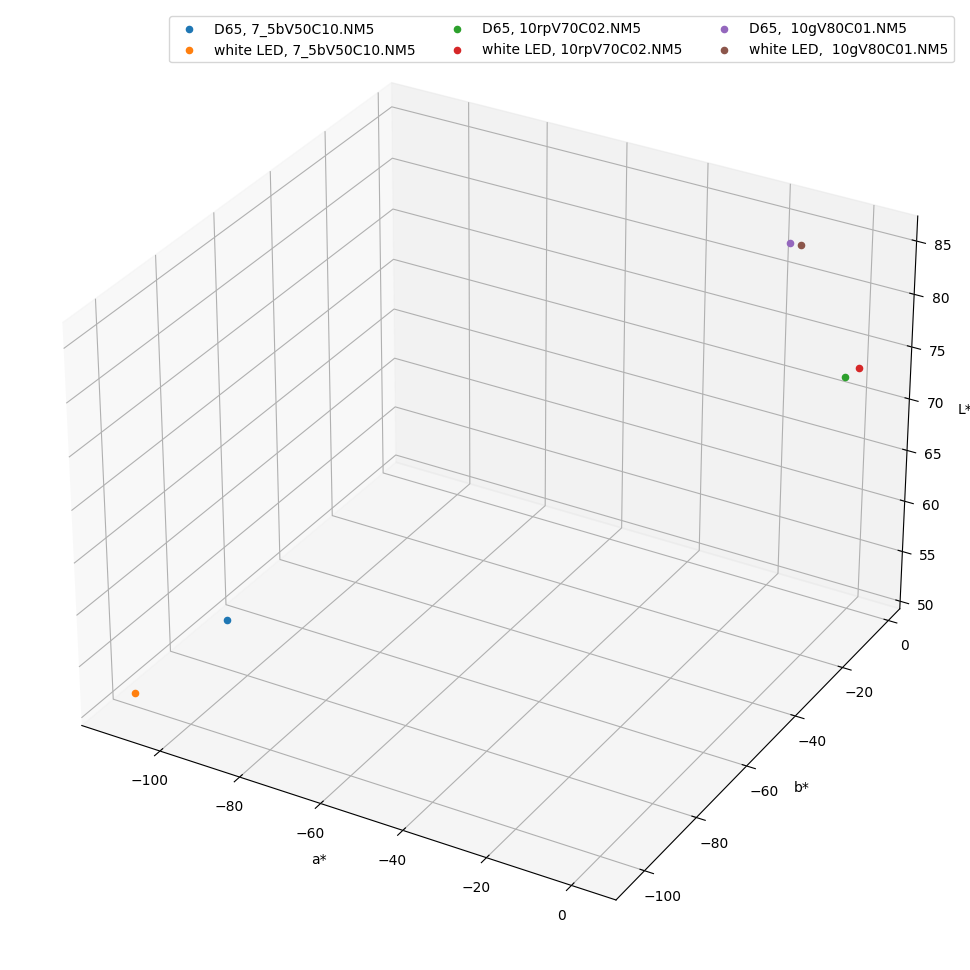

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:

shape = (32,128,3)

gt = np.zeros(shape)
wl_img = np.zeros(shape)
D65_img = np.zeros(shape)

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')

for i in range(3):
    L1, L2 = D65Params[i][0], LEDParams[i][0]
    a1, a2 = D65Params[i][1], LEDParams[i][1]
    b1, b2 = D65Params[i][2], LEDParams[i][2]
    ax.scatter(a1, b1, L1, label='D65,'+ chip_S[i])
    ax.scatter(a2, b2, L2, label='white LED,'+ chip_S[i])
    color_diff = np.sqrt((L1 - L2)**2 + (a1 - a2)**2 + (b1 - b2)**2)

    print("The color difference ΔE is: " + str(np.round(color_diff, 5)), end=' ')

    if color_diff > 2.3:
        print("thus it is differentiable")
    else:
        print("thus it is not differentiable")

ax.set_ylabel(r'b*')
ax.set_xlabel(r'a*')
ax.set_zlabel(r'L*')
ax.legend(bbox_to_anchor=(1, 1), ncol=3)
fig.tight_layout()
plt.savefig("3DPlot.png")
plt.show()
files.download("3DPlot.png")



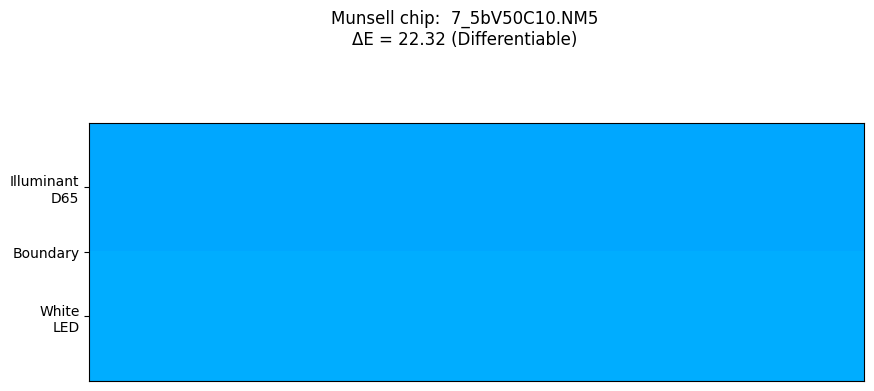

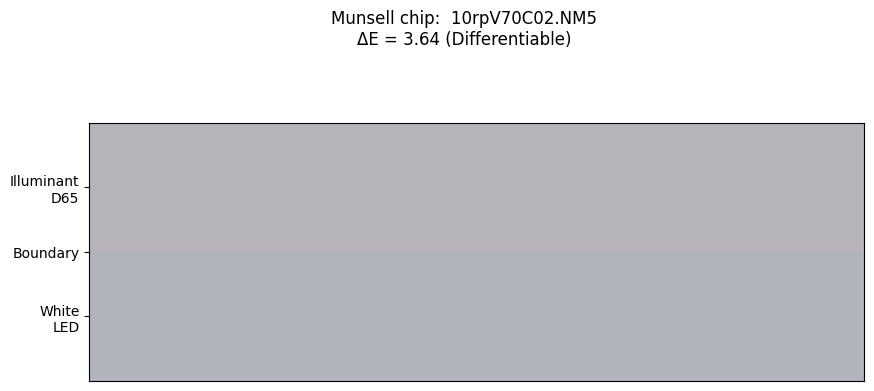

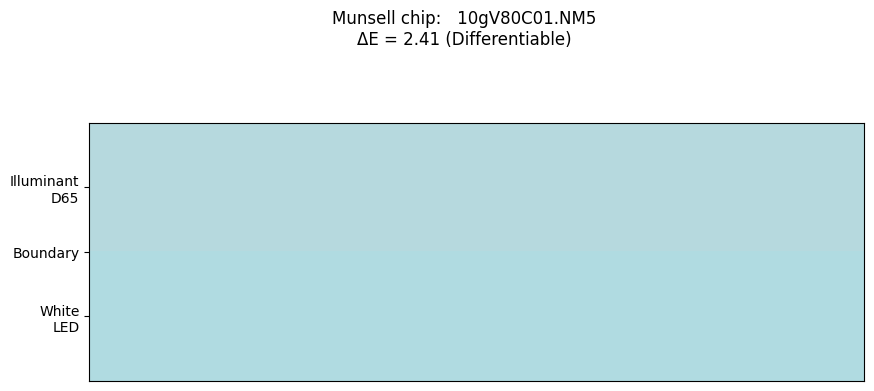

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
import zipfile

# Create a zip file to store the images
zip_filename = 'munsell_chips.zip'
with zipfile.ZipFile(zip_filename, 'w') as zip_file:

    for i in range(3):
        L1, L2 = D65Params[i][0], LEDParams[i][0]
        a1, a2 = D65Params[i][1], LEDParams[i][1]
        b1, b2 = D65Params[i][2], LEDParams[i][2]

        gt[...,:] = [Cs[i, 3], Cs[i, 4], Cs[i, 5]]
        wl_img[...,:] = [L1,a1,b1]
        D65_img[...,:] = [L2, a2, b2]

        gt = gt.astype(dtype=np.uint8)
        wl_img = lab2rgb(wl_img)
        D65_img = lab2rgb(D65_img)
        image = np.concatenate([D65_img, wl_img])
        fig, ax = plt.subplots(figsize=(10, 5))
        ax.imshow(image, extent=[0, 3, 0, 1])
        ax.set_xticks([])
        ax.set_yticks([0.25, 0.5, 0.75])
        ax.set_yticklabels(['White\nLED', 'Boundary', 'Illuminant\nD65'])
        titles = [
            'Illuminant D65',
            'White LED'
        ]
        color_diff = np.sqrt((L1 - L2)**2 + (a1 - a2)**2 + (b1 - b2)**2)
        if color_diff < 2.3:
            note = " (Not differentiable)"
        else:
            note = " (Differentiable)"
        fig.suptitle('Munsell chip: ' + Ss[i] + '\nΔE = ' + str(np.round(color_diff, 2)) + note)

        # Save the figure to the zip file
        plt.savefig(f'munsell_chip_{Ss[i]}.png')
        zip_file.write(f'munsell_chip_{Ss[i]}.png')

        plt.show()
        plt.close()

# Download the zip file containing all images
files.download(zip_filename)
